<a href="https://colab.research.google.com/github/Srikanthc9/ML-PROJETS/blob/main/California_House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np#Create numpy arrs
import pandas as pd#Df&manupulation
import matplotlib.pyplot as plt#Plots and Graphs
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
from sklearn.datasets import fetch_california_housing



In [4]:



# Load the California housing dataset
california_house_price = fetch_california_housing()

# Create a DataFrame with the feature data and column names
df = pd.DataFrame(california_house_price.data, columns=california_house_price.feature_names)

# Add the target (house prices) as a new column
df['HousePrice'] = california_house_price.target

# Display the first 5 rows of the DataFrame
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  HousePrice  
0    -122.23       4.526  
1    -122.22       3.585  
2    -122.24       3.521  
3    -122.25       3.413  
4    -122.25       3.422  


In [5]:
df.shape

(20640, 9)

In [6]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
HousePrice,0


In [7]:
#Statistical measures
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
correlation = df.corr()

<Axes: >

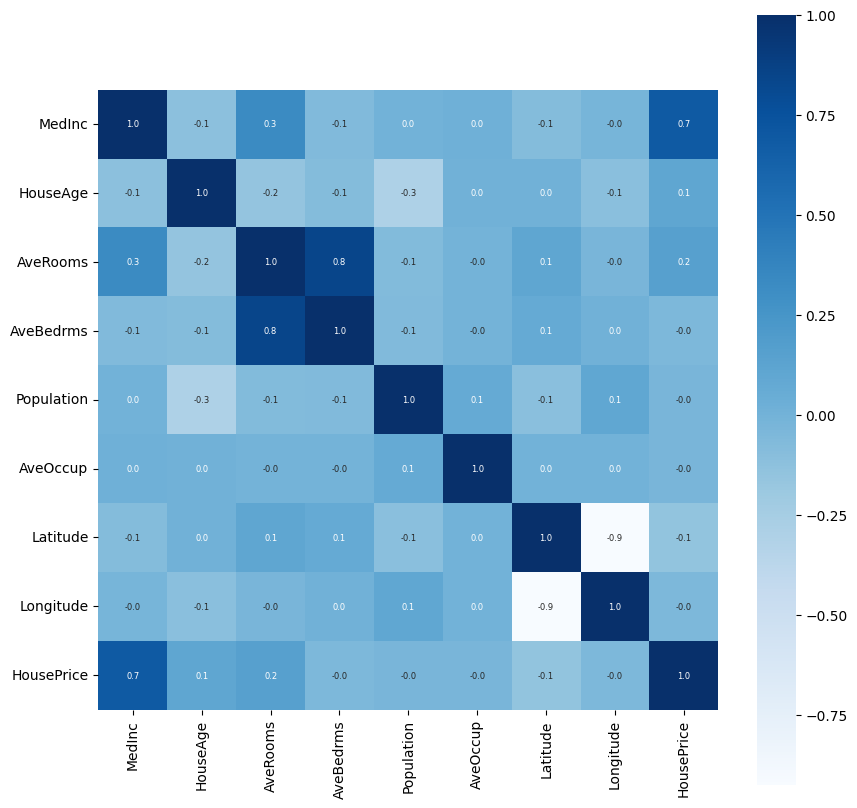

In [9]:
#Constructing a heat map
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar = True,square = True,fmt = '.1f',annot = True,annot_kws = {'size':6},cmap = 'Blues')
#sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')


In [10]:
#Spliting
X = df.drop(['HousePrice'],axis = 1)
Y = df['HousePrice']



In [11]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [12]:
#Spliting Training and Test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

In [13]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [14]:
#Model Training
model = XGBRegressor()
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [15]:
#Training model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
#Evalution


In [17]:
#Prediction of Training data

Train_data = model.predict(X_train)


In [18]:
#Model Prediction(Training data Acc)
print(Train_data)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [19]:
#Y_train:Original vals
print(Y_train)

2072     0.720
10600    2.741
2494     0.583
4284     2.000
16541    1.179
         ...  
1099     0.938
18898    1.031
11798    1.926
6637     1.535
2575     0.811
Name: HousePrice, Length: 16512, dtype: float64


In [20]:
#To compare we can use Metrics
#R squared error
r_score = metrics.r2_score(Y_train,Train_data)

In [21]:
#Absolute err
a_error = metrics.mean_absolute_error(Y_train,Train_data)

In [22]:
print(r_score)

0.943650140819218


In [23]:
print(a_error)

0.1933648700612105


In [24]:
#Test data acc vimp
Test_data = model.predict(X_test)


In [25]:
score_1 = metrics.r2_score(Y_test,Test_data)
score_2 = metrics.mean_absolute_error(Y_test,Test_data)


In [26]:
print("Test data ",score_1)

Test data  0.8338000331788725


In [27]:
print(score_2)

0.3108631800268186


Text(0.5, 1.0, 'Actual Price Vs Predicted Price')

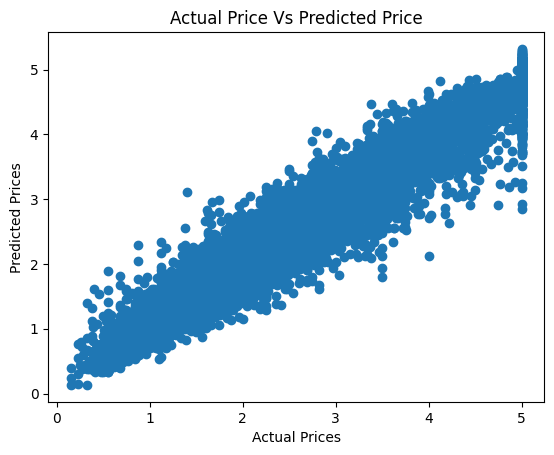

In [28]:
#Visualisation the actual and predicted prices
plt.scatter(Y_train,Train_data)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price Vs Predicted Price")

In [29]:
#Values are very close to the each other that means my model predicts well#
